# 이미지 인식(MNIST) - CNN

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
#X_test.shape[0] = -1
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [17]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), activation = 'relu'), #컨볼루션 층 생성
    Conv2D(64, (3, 3), activation='relu'), #컨볼루션 층 추가
    MaxPooling2D(pool_size=2), #컨볼루션 결과 축소
    Dropout(0.25), #25% 노드를 끄는 것
    Flatten(), #일차원으로 바꿔주는 레이어
    Dense(128, activation='relu'), 
    Dropout(0.5), #50% 노드를 끄는 것
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [23]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [20]:
modelpath = MODEL_DIR + 'minst-cnn-{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
early_stopping_callbak = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size = 200, callbacks = [early_stopping_callbak, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 47s 788us/step - loss: 0.3240 - accuracy: 0.9011 - val_loss: 0.0584 - val_accuracy: 0.9817

Epoch 00001: val_loss improved from inf to 0.05838, saving model to ./model/minst-cnn-01-0.0584.hdf5
Epoch 2/30
60000/60000 [==============================] - 46s 772us/step - loss: 0.1005 - accuracy: 0.9703 - val_loss: 0.0433 - val_accuracy: 0.9852

Epoch 00002: val_loss improved from 0.05838 to 0.04332, saving model to ./model/minst-cnn-02-0.0433.hdf5
Epoch 3/30
60000/60000 [==============================] - 48s 792us/step - loss: 0.0746 - accuracy: 0.9777 - val_loss: 0.0402 - val_accuracy: 0.9871

Epoch 00003: val_loss improved from 0.04332 to 0.04021, saving model to ./model/minst-cnn-03-0.0402.hdf5
Epoch 4/30
60000/60000 [==============================] - 48s 792us/step - loss: 0.0618 - accuracy: 0.9812 - val_loss: 0.0308 - val_accuracy: 0.9890

Epoch 00004: val_loss improved from 0.0

In [22]:
from keras.models import load_model
del model
model = load_model('model/minst-cnn-05-0.0306.hdf5')

OSError: Unable to open file (unable to open file: name = 'model/minst-cnn-05-0.0306.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test, Y_test, verbose=0)[1]))

In [11]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

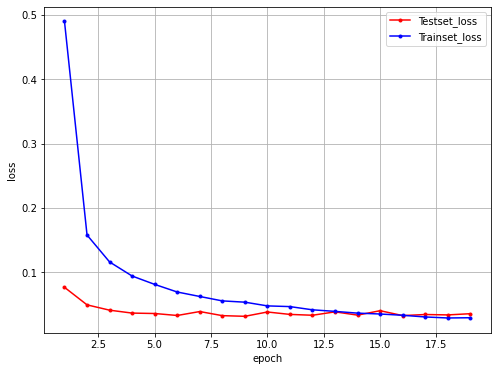

In [12]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 결론: BEST Model은 Epoch 16, 정확도는 99.34%